# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Fawaid As'ad
- Email: Muhammad Fawaid As'ad
- Id Dicoding:fawaid27

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV

### Menyiapkan data yang akan diguankan

## Data Understanding

Data yang digunakan merupakan data performas siswa jaya jaya institut yang diambil dari https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

Students' Performance
- Marital status : The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
- Application mode : The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
- Application order : The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice)
- Course : The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)
- Daytime/evening attendance : Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening
- Previous qualification : The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)
- Previous qualification (grade): Grade of previous qualification (between 0 and 200)
- Nacionality :	The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian
- Mother's qualification : The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
- Father's qualification : The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
- Mother's occupation : The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
- Father's occupation : The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers
- Admission grade : Admission grade (between 0 and 200)
- Displaced : Whether the student is a displaced person. (Categorical) 1 – yes 0 – no
- Educational special needs : Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no
- Debtor : Whether the student is a debtor. (Categorical) 1 – yes 0 – no
- Tuition fees up to date : Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no
- Gender : The gender of the student. (Categorical) 1 – male 0 – female
- Scholarship holder : Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no
- Age at enrollment : The age of the student at the time of enrollment. (Numerical)
- International : Whether the student is an international student. (Categorical) 1 – yes 0 – no
- Curricular units 1st sem (credited) : The number of curricular units credited by the student in the first semester. (Numerical)
- Curricular units 1st sem (enrolled) : The number of curricular units enrolled by the student in the first semester. (Numerical)
- Curricular units 1st sem (evaluations) : The number of curricular units evaluated by the student in the first semester. (Numerical)
- Curricular units 1st sem (approved) : The number of curricular units approved by the student in the first semester. (Numerical)
- Status : Enrolled, Dropout, and Graduate

In [2]:
# import dataset performa siswa
edu = pd.read_csv("data.csv", sep=';')

Import data csv dengan mendambahkan keterangan parameter sep karena didalam datanya delimiternya menggunakan (;) bukan menggunakan (,) agar hasil yang didapatkan datanya sesuai

In [3]:
# menampilkan 5 data pertama
edu.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


menampilkan 5 data pertama dari data performas siswa

In [4]:
# Menghitung jumlah baris dan kolom
print("Data shape:", edu.shape)

Data shape: (4424, 37)


jumlah data yang dihasilkan ada 4424 baris dan 37 kolom

In [5]:
# Menampilkan jumlah data dan bentuk type data
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Info yang didapat dari data tersebut ada tiga type data yaitu integer, float, dan object. Jumlah type data integer 29 kolom, type data float 7 kolom, dan type data object 1 kolom

In [6]:
# deskripsi dari dataset yang memili type float atau integer
edu.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


deskripi untuk mengetahui persebaran nilai batasan tiap kolom

In [7]:
#mendeteksi missing value
print("\nNull Values:")
print(edu.isnull().sum())


Null Values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                   

Dari data 37 kolom tidak ada missing value sehingga dalam data preparation tidak diperlukan mengatasi missing value

In [8]:
#menampilkan jumlah data duplikat
edu.duplicated().sum()

0

Data tidak ada yang duplikat

In [9]:
#menampilkan jumlah siswa yang Enroled, dropout, dan graduate
print("Status Value Counts:")
print(edu["Status"].value_counts())

Status Value Counts:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


Banyaknya siswa yang lulus 2209, yang dikeluarkan 1421, dan yang masih aktif 794

**Eksplorasi Data Analisis**

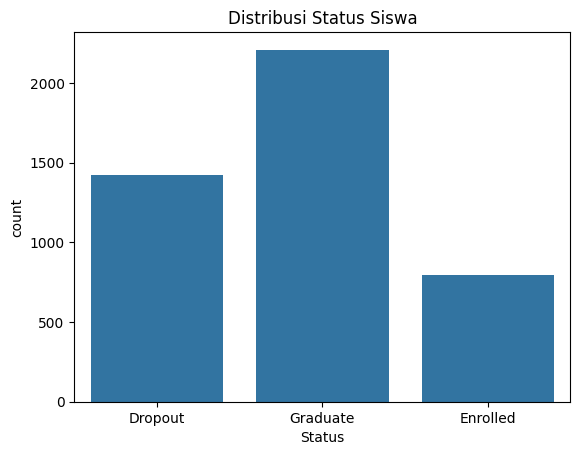

In [10]:
#distribusi Status siswa
sns.countplot(data=edu, x="Status")
plt.title("Distribusi Status Siswa")
plt.show()

dilihat distribusi data tersebut data kurang seimbang

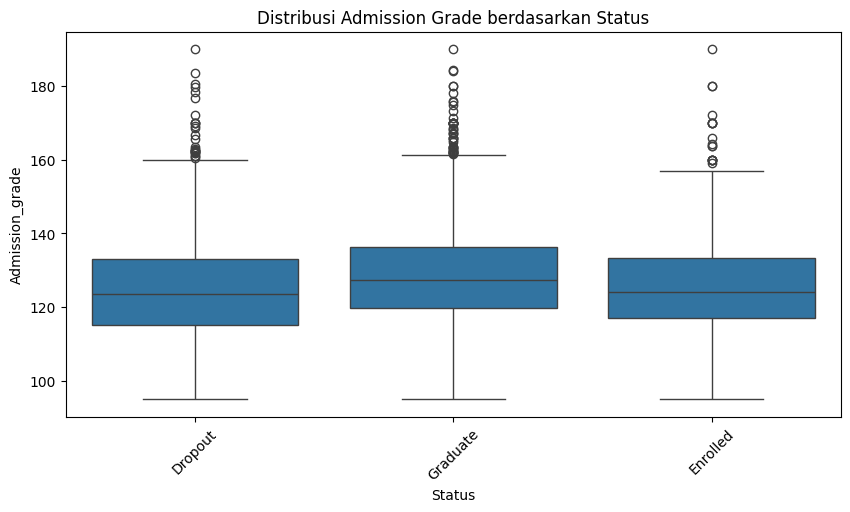

In [11]:
# Boxplot nilai berdasarkan status siswa
plt.figure(figsize=(10, 5))
sns.boxplot(data=edu, x="Status", y="Admission_grade")
plt.title("Distribusi Admission Grade berdasarkan Status")
plt.xticks(rotation=45)
plt.show()

Dari gambar boxplot tersebut didapatkan data outlier namun data tersebut merupakan data alamiah sehingga tidak perlu dilakukan penanganan data outlier

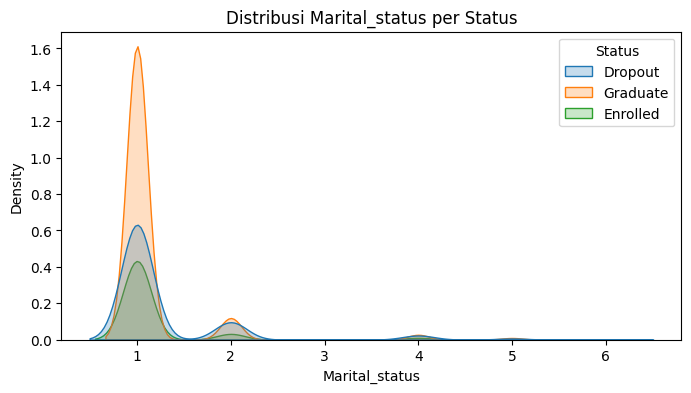

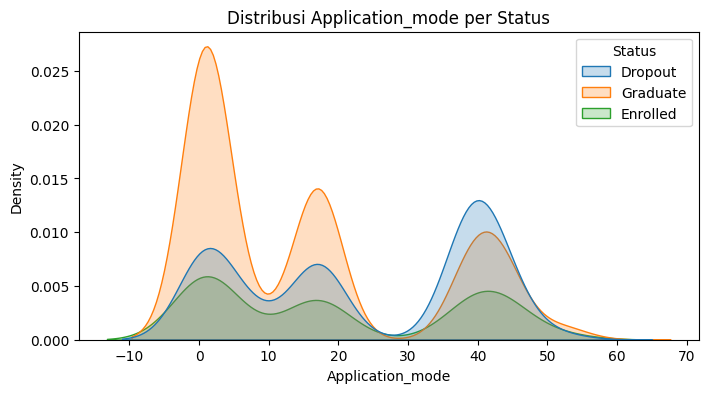

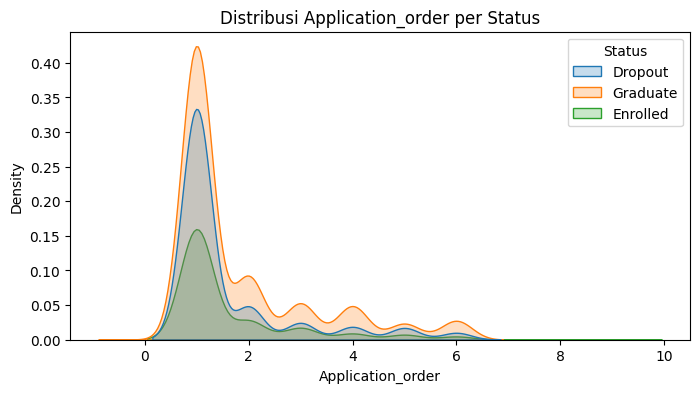

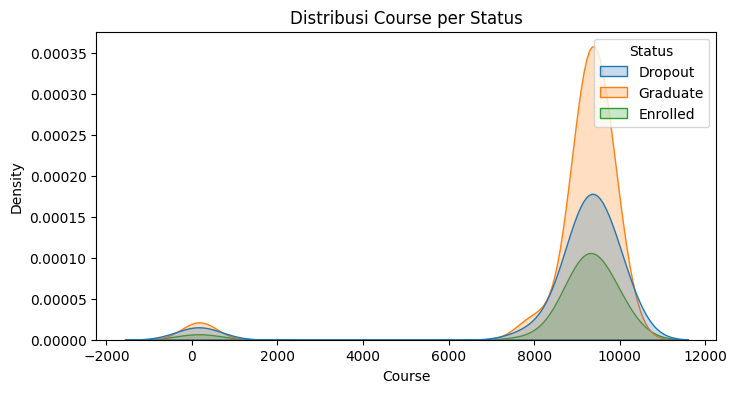

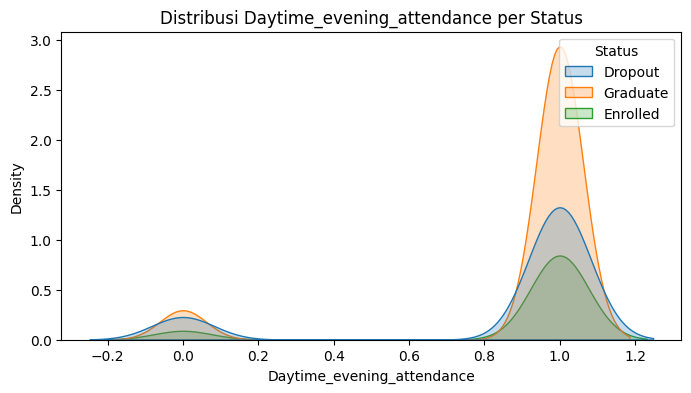

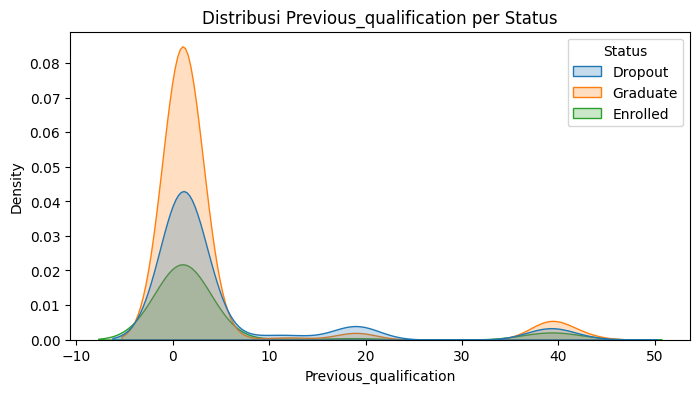

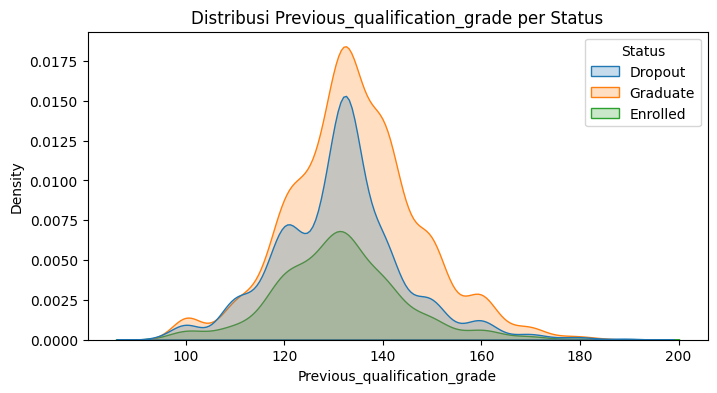

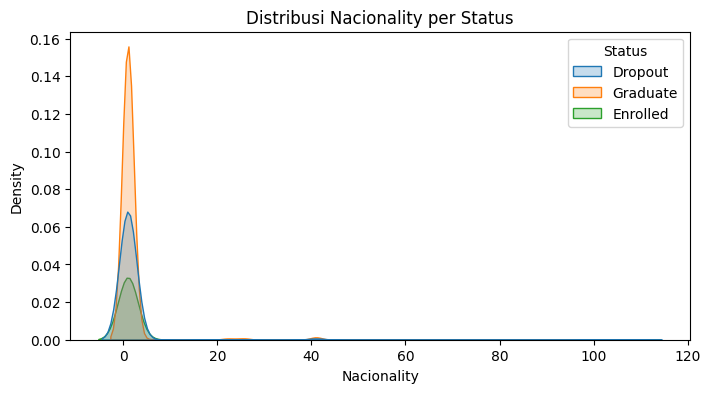

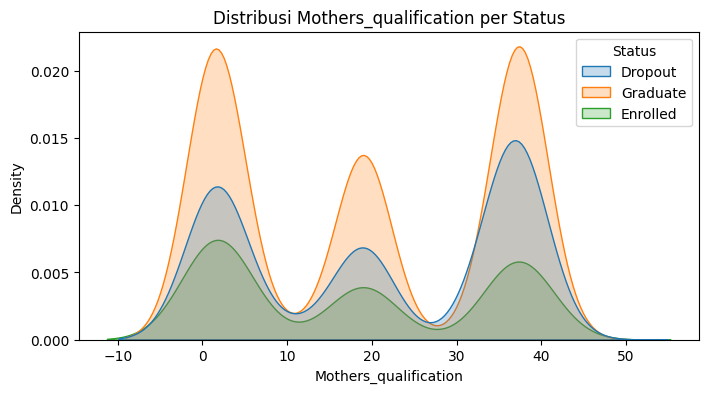

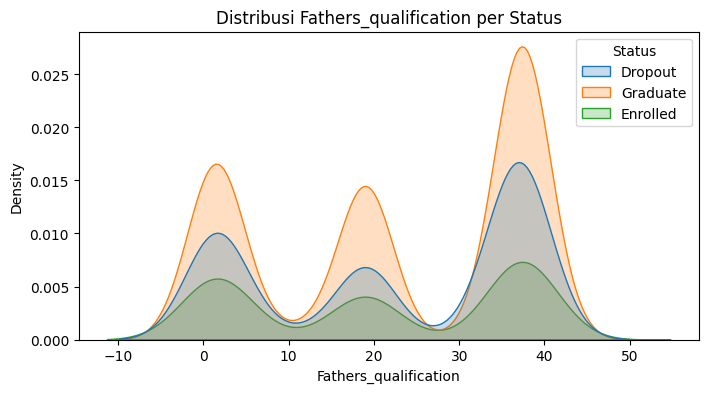

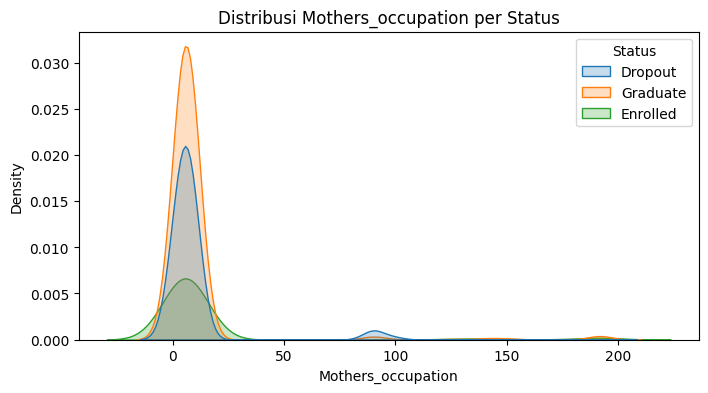

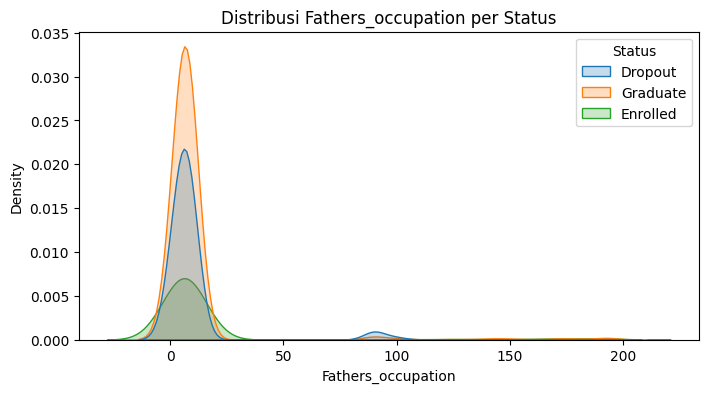

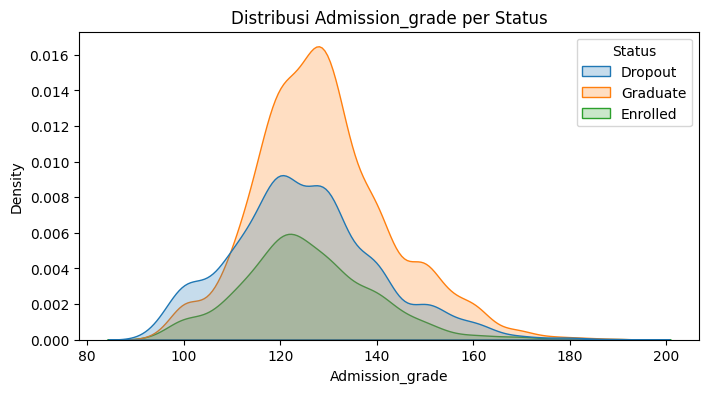

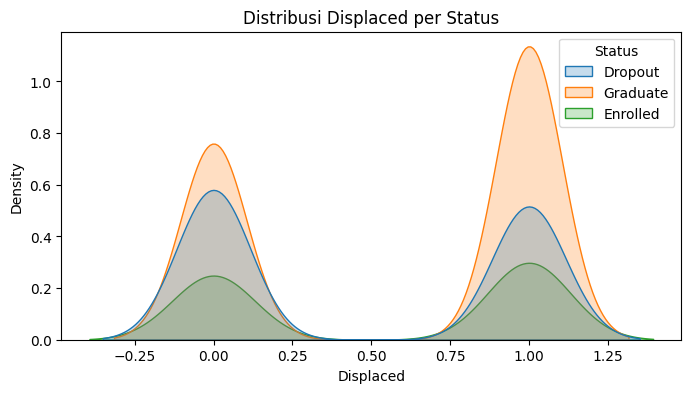

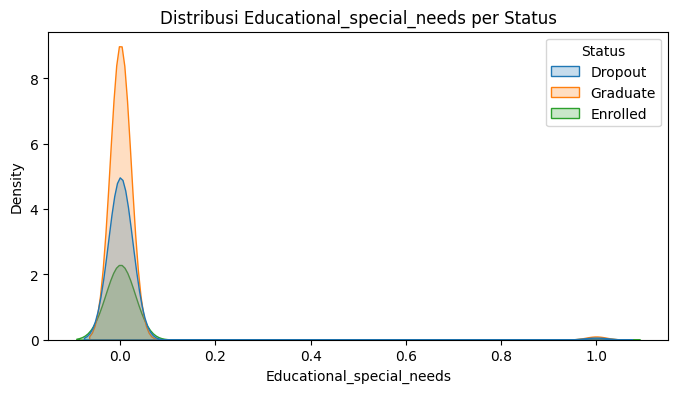

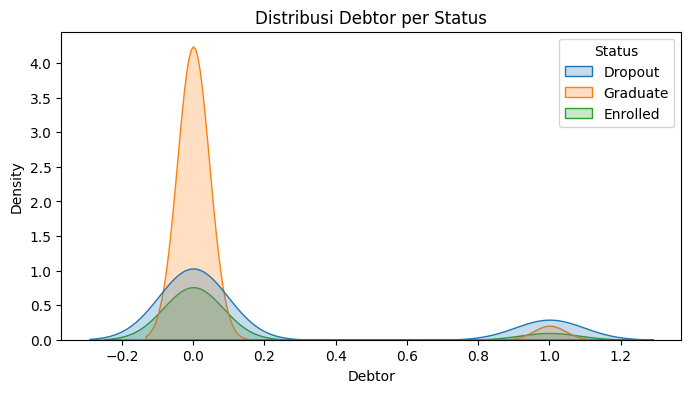

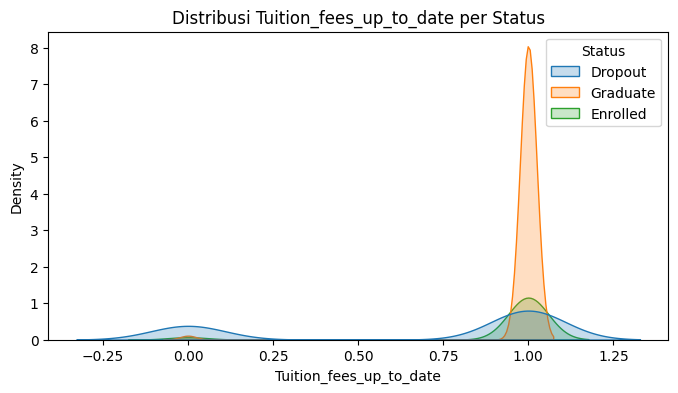

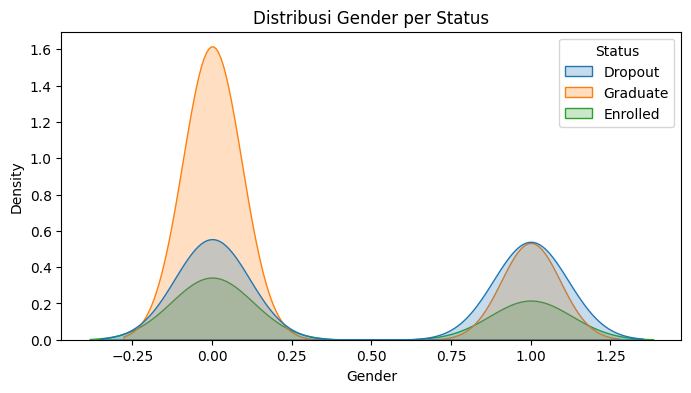

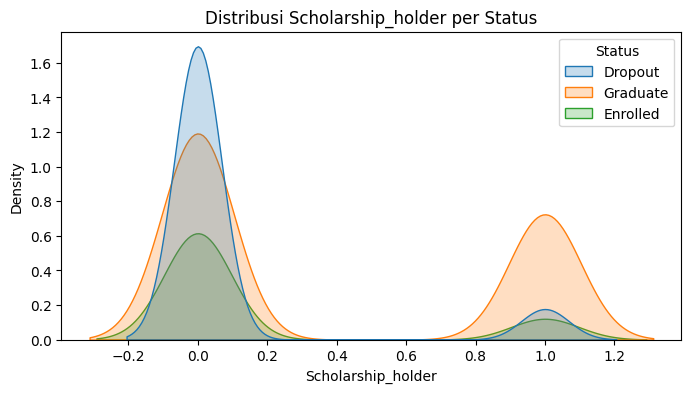

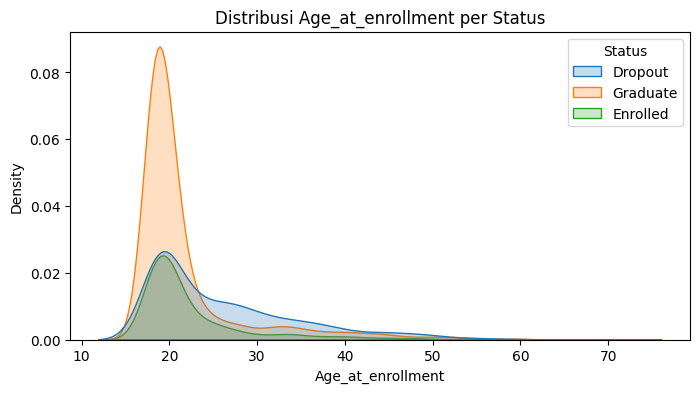

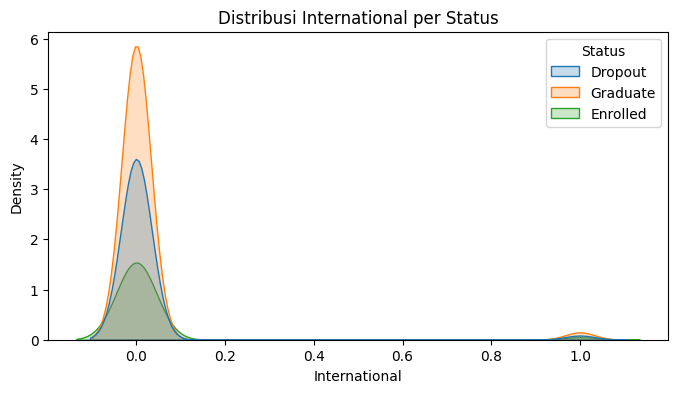

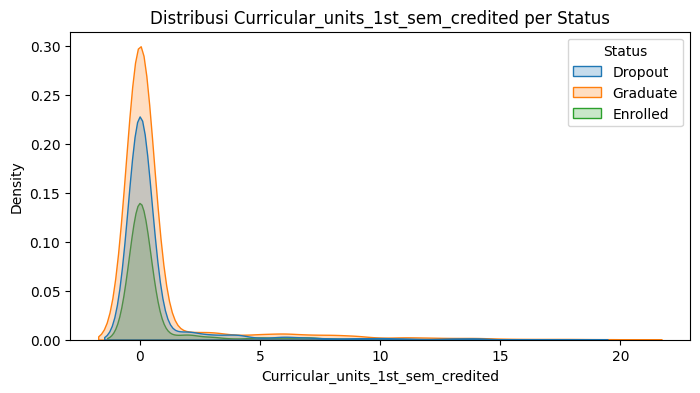

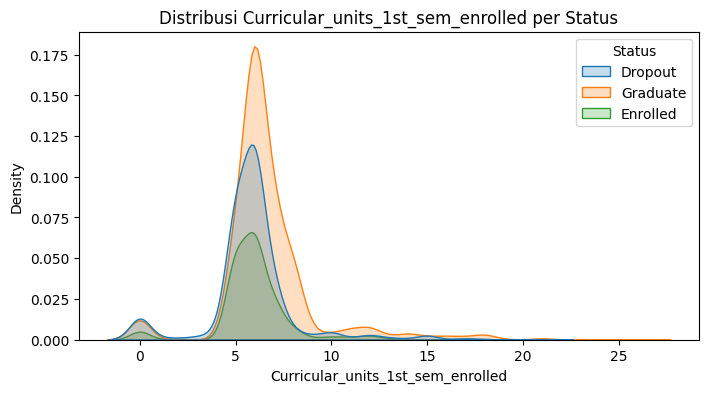

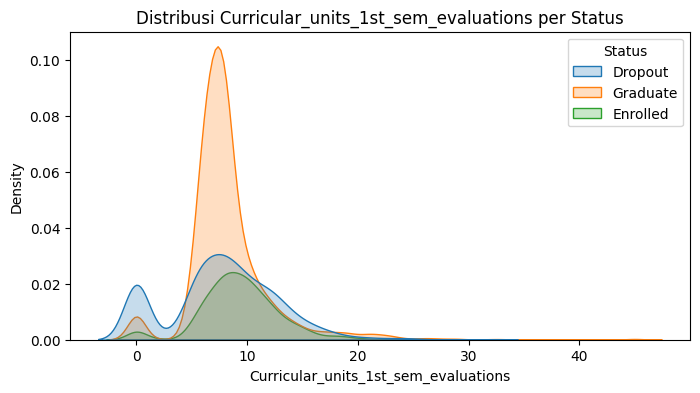

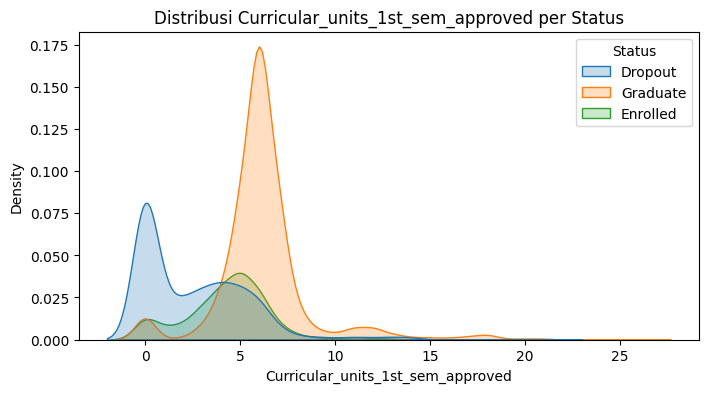

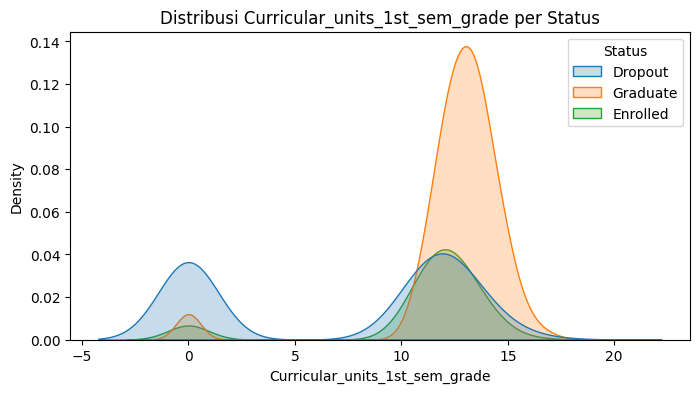

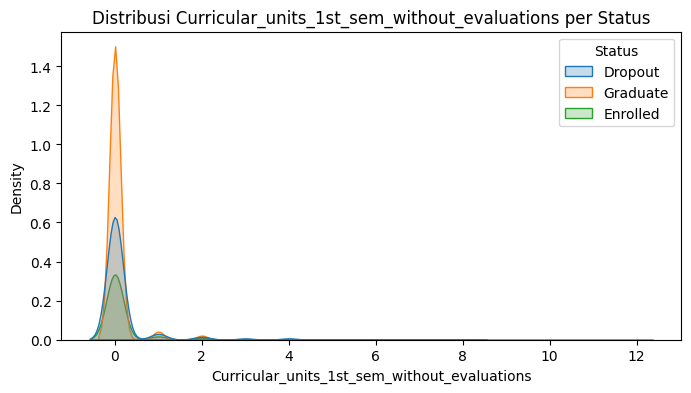

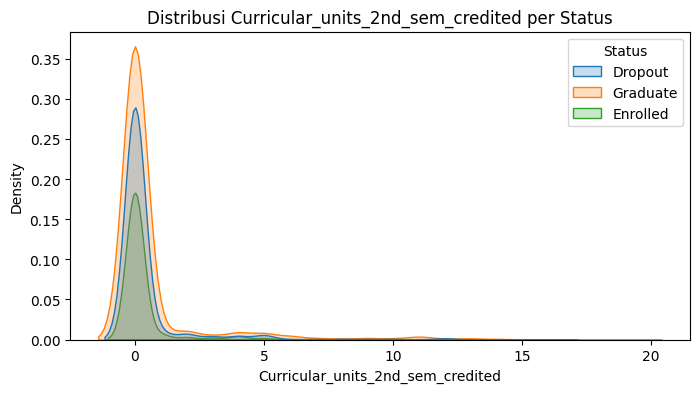

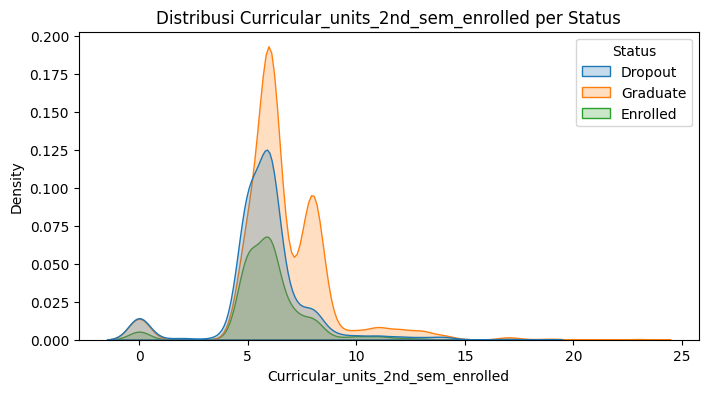

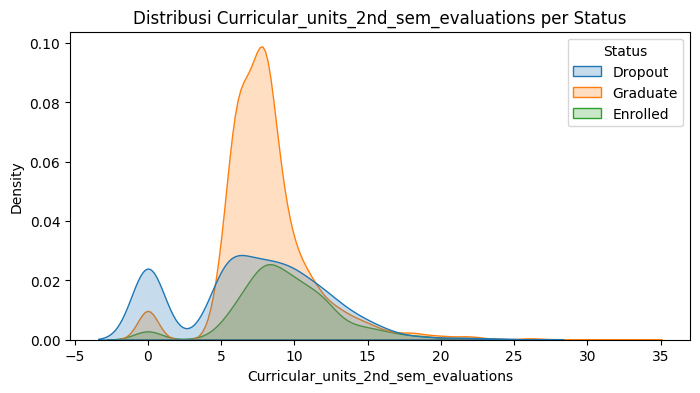

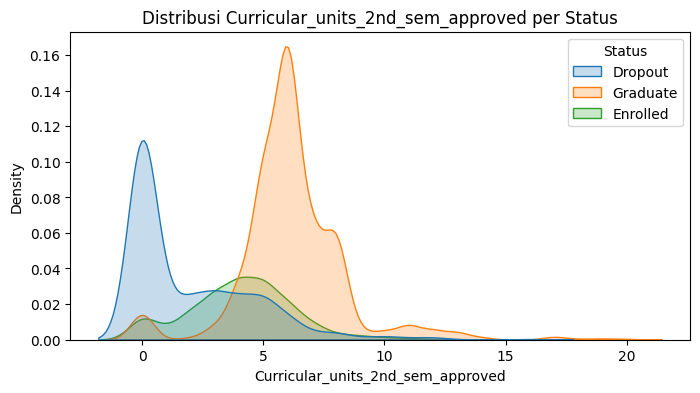

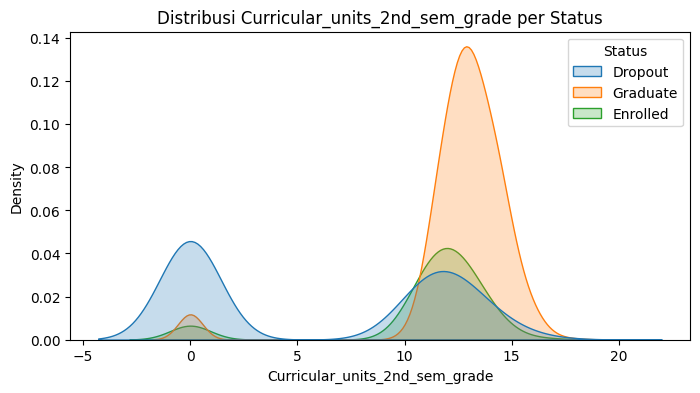

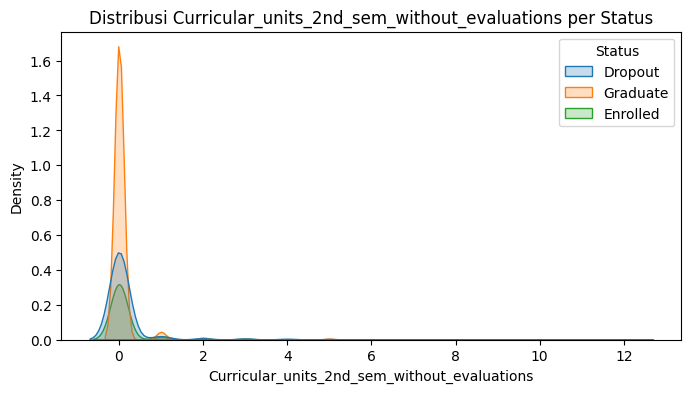

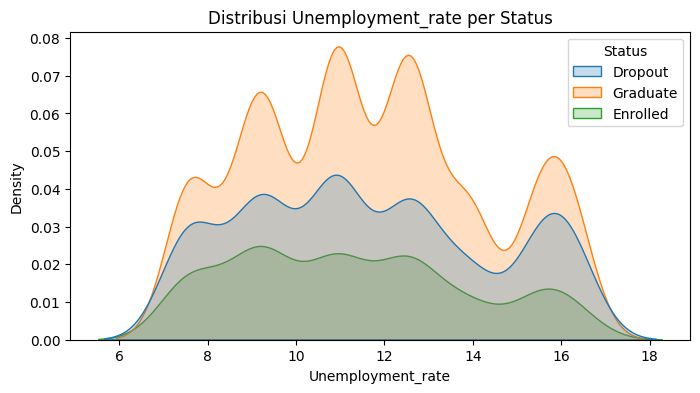

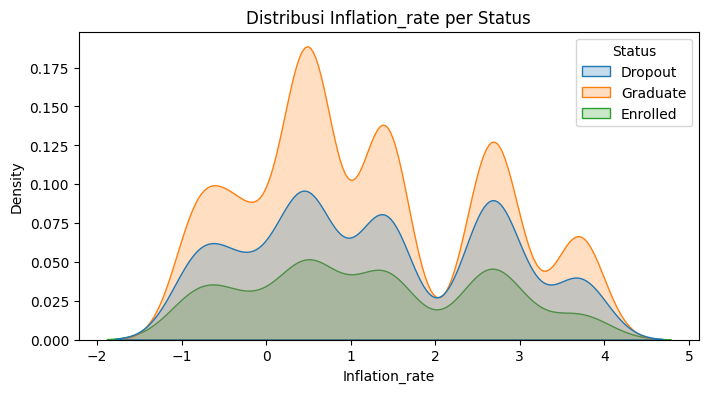

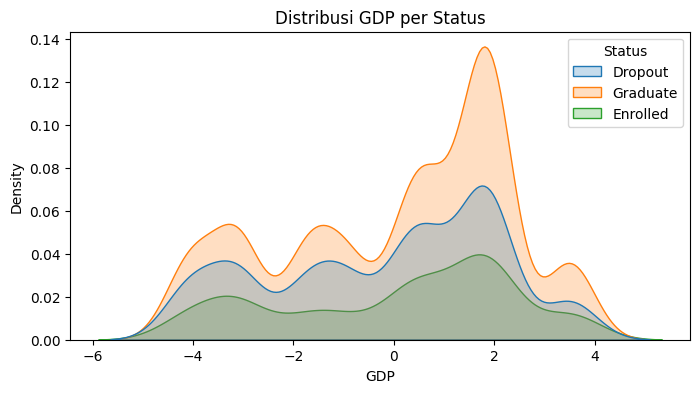

In [12]:
# 3. Distribusi Numerik per Kelas
# =============================
num_cols =edu.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=edu, x=col, hue="Status", fill=True)
    plt.title(f"Distribusi {col} per Status")
    plt.show()

Proses KDA numerik yang bertujuan untuk melihat distribusi data disetiap kelas status di setiap fitur numerik. Semakin distribusi antar kelas berbeda maka semakin baik dan sebaliknya semakin distribusi semakin mirip dan tumpang tindih maka data tersebut kurang baik untuk proses klasikasi

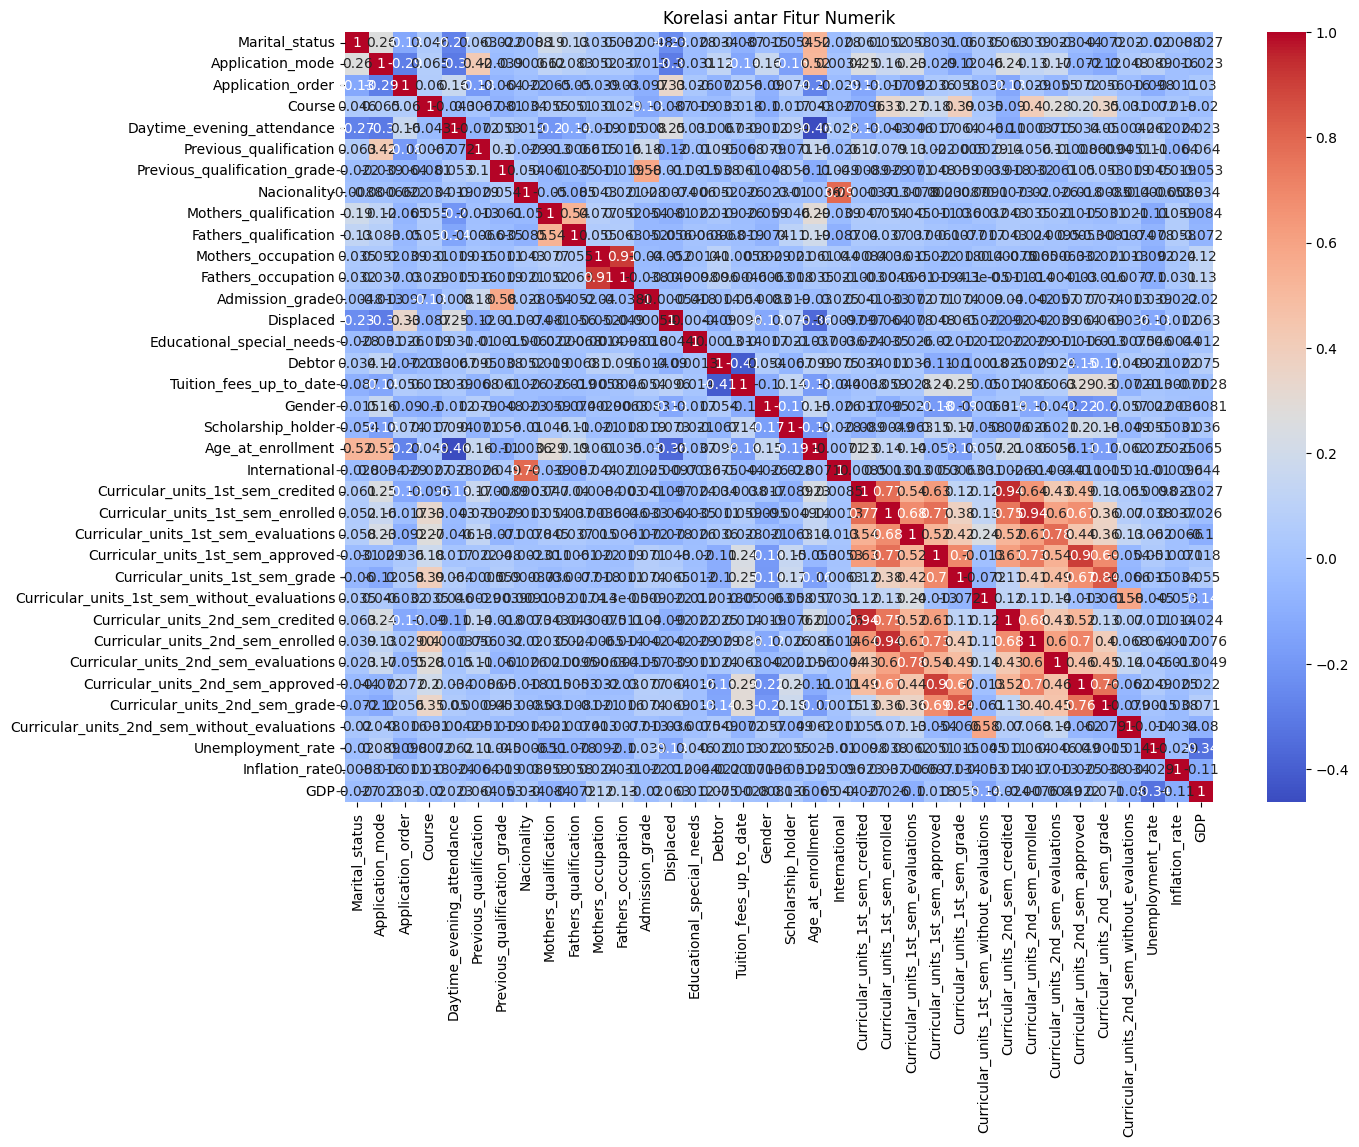

In [13]:
# 4. Korelasi Fitur Numerik
# =============================
plt.figure(figsize=(14, 10))
sns.heatmap(edu[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

Proses heatmap korelasi antar fitur semakin mendekati angkat 1 maka fitur saling berkorelasi positif dan semakin mendekati angka -1 maka fitur tersebut saling berkorelasi negatif. 

## Data Preparation / Preprocessing

In [14]:
# Encode kolom Status menjadi angka
le = LabelEncoder()
edu['Status_encoded'] = le.fit_transform(edu['Status'])

label encoder untuk type data kategorikal menjadi numerik. yang mana data tersebut dikolom status

In [15]:
# Lihat hasil encoding
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


melihat hasil encode yang mana hasilnya 'Dropout': 0, 'Enrolled': 1, 'Graduate': 2. jika tidak menambahkan encode manual maka encode akan diurutkan berdasarkan abjad awal kata tersebut.

In [16]:
# Sekarang buat dataframe numerik lengkap dengan kolom Status_encoded
numeric_edu = edu.select_dtypes(include=["number"])  # akan termasuk 'Status_encoded' sekarang

# Hitung korelasi terhadap 'Status_encoded'
correlations = numeric_edu.corr()['Status_encoded'].sort_values(ascending=False)

print(correlations)

Status_encoded                                  1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evalua

menampilkan nilai korelasi fitur statur dengan fitur lain dengan mengurutkan nilai terbesar ke paling kecil. nilai korelasi postifi tertinggi bernilai 0.624157 dari kolom Curricular_units_2nd_sem_approved. kemudian nilai korelasi mendekati -1 yaitu Age_at_enrollment  dengan nilai -0.243438

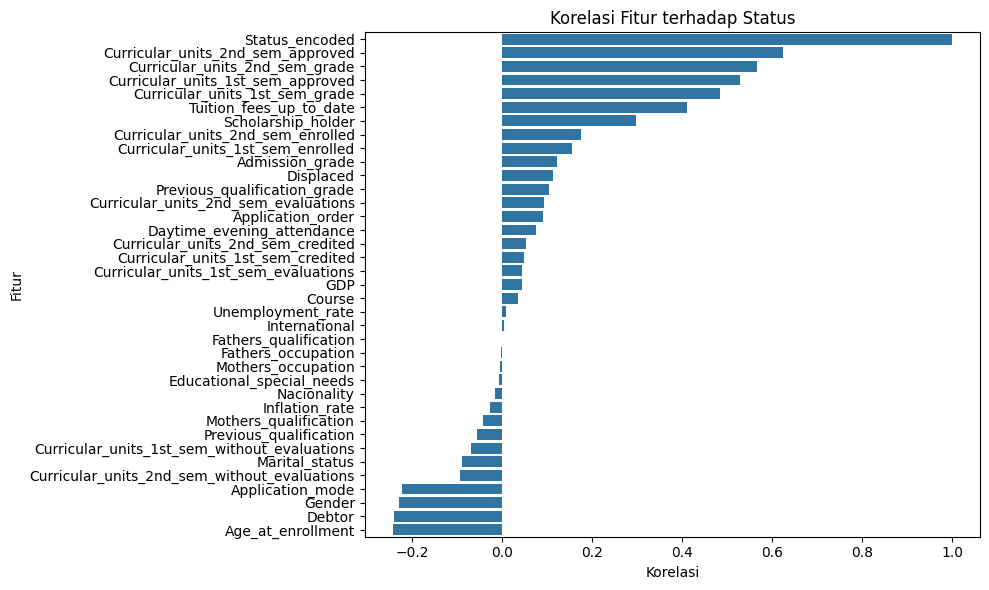

In [17]:
#cek barplot dari korelasi dengan status
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Korelasi Fitur terhadap Status")
plt.xlabel("Korelasi")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

menampilkan boxplot untuk melihat sebaran nilai korelasi

In [18]:
# Top 10 fitur yang paling berkorelasi dengan status encoded
top_corr = correlations.drop("Status_encoded").abs().sort_values(ascending=False).head(10).index
print(top_corr)

Index(['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
       'Debtor', 'Gender', 'Application_mode'],
      dtype='object')


menampilkan 10 nilai terbesar yang memiiki korelasi tertinggi dengan status encode yang akan digunakan untuk memilih fitur

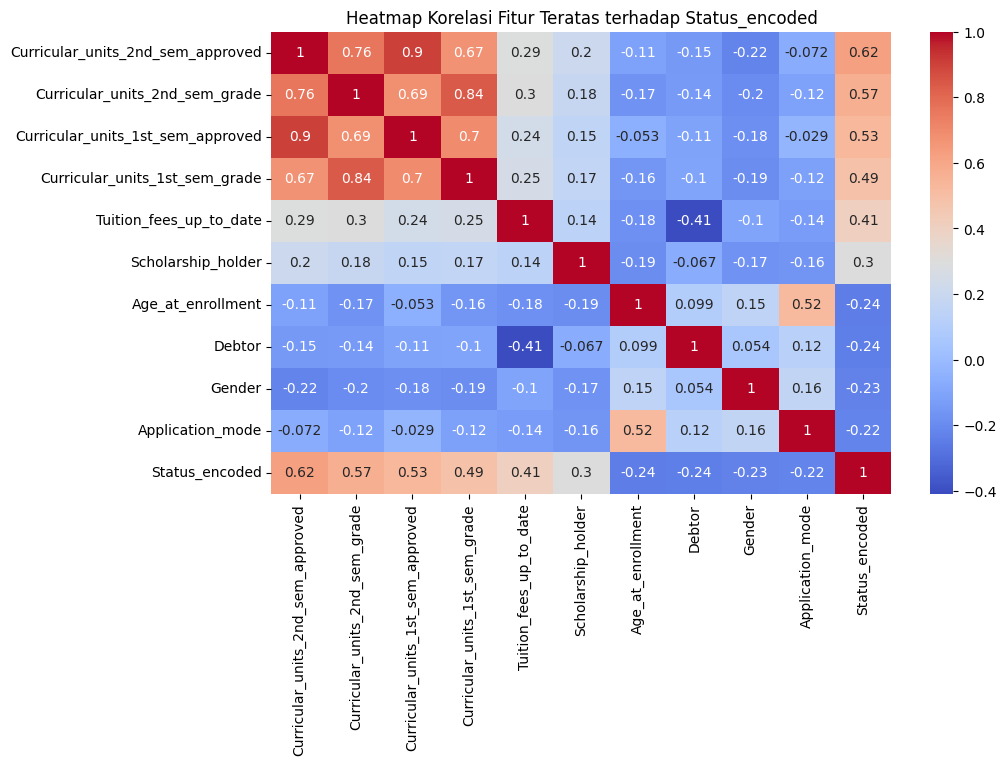

In [19]:
# Matriks Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_edu[top_corr.tolist() + ["Status_encoded"]].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Teratas terhadap Status_encoded")
plt.show()

In [20]:
# 5 fitur yang paling berkorelasi terhadap Attrition dan domain knowledge
top_features = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
       'Debtor', 'Gender', 'Application_mode']

# X dan y
X_top = edu[top_features]
y = edu['Status_encoded']

Membagi data X dan Y. data X menggunakan top 10 feature sedangkan data Y dengan status encoded

In [21]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

membagi data train dan test dengan 80% data train dan 20% data test

In [22]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # test tidak perlu di-resample

stadarisasi data agar data bisa serentak tidak memilik rentang yang jauh dengan memiliki skala yang sama

In [23]:
# PCA (misalnya 2 komponen, bisa disesuaikan)
pca = PCA(n_components=2)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

Mereduksi data fitur dari 10 fitur menjadi 2 komponen dengan tidak mengurangi informasi yang tersedia

## Modeling

In [24]:
 #Inisialisasi model dengan class_weight atau parameter khusus
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),  # Tidak support class_weight secara langsung
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

Modeling dengan mengambil 3 model untuk membandingkan hasil model yang terbaik untuk didgunakan sebagai model didalam aplikasi. Model yang digunakan yaitu random forest, gradient boosting, dan xgbost.

## Evaluation

In [25]:
# Training dan evaluasi
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n📌 Model: {name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


📌 Model: Random Forest
Akurasi: 0.7062146892655368
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       284
           1       0.38      0.28      0.32       159
           2       0.76      0.87      0.81       442

    accuracy                           0.71       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.71      0.69       885


📌 Model: Gradient Boosting
Akurasi: 0.751412429378531
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       284
           1       0.51      0.26      0.35       159
           2       0.77      0.94      0.85       442

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885


📌 Model: XGBoost
Akurasi: 0.7152542372881356
Classification Report:
              

dari hasil training tersebut akurasi yang tertinggi yaitu model gradient bosting dengan akurasi 0.751412429378531

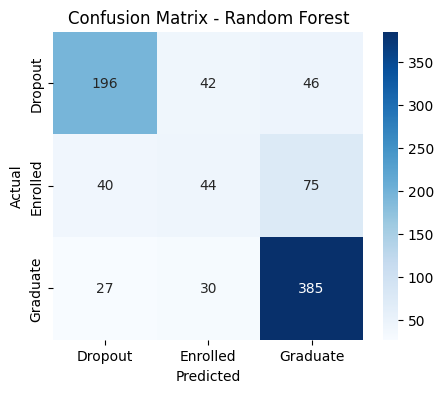

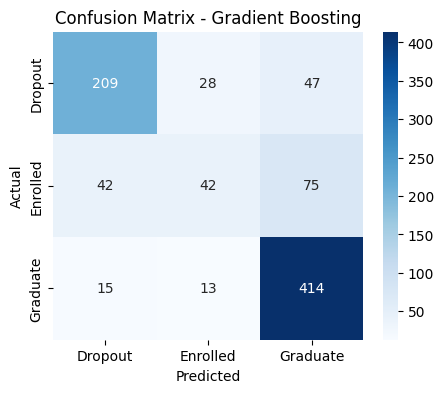

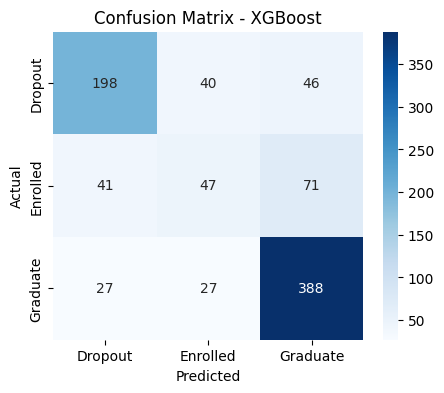

In [26]:
#menampilkan cofussion matriks
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Menampilkan cofussion matrik untuk mengetahui jumlah niali hasil prediksi dan actual. Dari nilai tersebut yang memiliki prediksi banyak salah di enrolled

### Hyperparameter Tuning

Hyperparameter digunakan untuk meningkatkan model yang memiliki akurasi yang paling baik di evaluasi model biasa

In [27]:
# --- Parameter grid untuk RandomizedSearch ---
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Parameter grid yang digunakan untuk mencari parameter terbaik

In [28]:
# --- Inisialisasi model Gradient Boosting ---
gb_model = GradientBoostingClassifier(random_state=42)

inisialisasi model model gradient bosting untuk ditingkatkan akurasinya

In [29]:
# --- Randomized Search ---
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=30,  # jumlah kombinasi yang diuji
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

memanggil tuning randomized search dengan iterasi 30 kali dengan cross validation 5

In [30]:
# --- Fit ke data training ---
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

fit data ke data training

In [31]:
# --- Evaluasi hasil terbaik ---
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n✅ Best Parameters:", random_search.best_params_)
print("🎯 Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("📋 Classification Report:\n", classification_report(y_test, y_pred_best))


✅ Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05}
🎯 Best Accuracy: 0.7480225988700565
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       284
           1       0.49      0.26      0.34       159
           2       0.77      0.93      0.84       442

    accuracy                           0.75       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.73      0.75      0.73       885



Hasiil evaluasi setelah dituning dengan randomized search akurasi pada model gradient bost yaitu 0.7480225988700565. Hal ini mengalami penurunan dari model biasa yaitu memiliki nilai 0.751412429378531. Sehingga model yang akan dipakai yaitu model biasa atau default tanpa dilakukan proses hyperparameter tuning

### Percobaan Model

In [32]:
# Ambil satu sampel dari X_test
sample = X_test.iloc[[0]]

# Transformasi dengan scaler (harus sesuai fitur aslinya)
sample_scaled = scaler.transform(sample)

# Transformasi PCA
sample_pca = pca.transform(sample_scaled)

# Prediksi dengan Gradient Boosting
prediction = models["Gradient Boosting"].predict(sample_pca)

# Tampilkan hasil
print("📌 Contoh Prediksi:")
print("Fitur input:")
print(sample)
print("Hasil prediksi (encoded):", prediction[0])
print("Label prediksi:", le.inverse_transform([prediction[0]])[0])

📌 Contoh Prediksi:
Fitur input:
      Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
1853                                  6                       14.666667   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
1853                                  6                            14.0   

      Tuition_fees_up_to_date  Scholarship_holder  Age_at_enrollment  Debtor  \
1853                        1                   0                 20       0   

      Gender  Application_mode  
1853       1                44  
Hasil prediksi (encoded): 2
Label prediksi: Graduate


Percobaan model ini dilakukan mengambil data random kemudian model diperintah untuk menebak hasil label berdarkan 10 fitur yang telah dipilih

In [33]:
# Ambil satu sampel dari X_test
index = 0  # ganti index jika ingin melihat baris lain
sample = X_test.iloc[[index]]  # Data fitur asli
true_label = y_test.iloc[index]  # Label sebenarnya (encoded)

# Lakukan scaling sesuai pipeline training
sample_scaled = scaler.transform(sample)

# Lakukan transformasi PCA
sample_pca = pca.transform(sample_scaled)

# Prediksi menggunakan model Gradient Boosting (atau model lain)
prediction = models['Gradient Boosting'].predict(sample_pca)[0]

# Konversi label numerik ke label asli (jika ada label_encoder)
predicted_label = le.inverse_transform([prediction])[0]
actual_label = le.inverse_transform([true_label])[0]

# Tampilkan hasil
print("📌 Prediksi Model:", predicted_label)
print("✅ Label Sebenarnya:", actual_label)

# Cek apakah prediksi benar atau salah
if prediction == true_label:
    print("🎉 Hasil prediksi BENAR!")
else:
    print("❌ Hasil prediksi SALAH.")


📌 Prediksi Model: Graduate
✅ Label Sebenarnya: Graduate
🎉 Hasil prediksi BENAR!


Proses untuk memastikan hasil prediksi model dengan data validasi apakah prediksi tersebut benar atau salah

In [34]:
# Simpan model terbaik (Random Forest)
best_model = models["Gradient Boosting"]
joblib.dump(best_model, 'gradien_bosting_model.pkl')

print("✅ Model Random Forest berhasil disimpan sebagai 'gradien_bosting_model.pkl'")

✅ Model Random Forest berhasil disimpan sebagai 'gradien_bosting_model.pkl'


Menyimpal model terbaik untuk di load di app streamlit

In [36]:
# Simpan preprocessing tools
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

Menyimpan proses preprocessing tools agar bisa memprediksi ulang di dashboard streamlit

In [37]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


untuk mengambil data library agar tidak ada error library dependensi ketika akan memakai model